# Firstly, we'll start by importing the libraries


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


# Dataset...


In [2]:
df = pd.read_csv('main.csv', na_values='?')

In [3]:
df['Persistency'].value_counts(dropna = False)

0    2135
1    1289
Name: Persistency, dtype: int64

# Here, I'm gonna create some dummy variables using all the columns in the data we have 


In [19]:
numeric_cols = ['Gender', 'Race', 'Ethnicity', 'Region', 'Age', 'NSF',
                'NF', 'NSB', 'GRPN', 'GRDR', 'DFDR', 'DDR', 'FFPN', 'FFDR', 'RSPN',
                'TBPN', 'RSDR', 'TBDR', 'CTS', 'CRS', 'AF', 'II', 'IEDR', 'CEFSFMN',
                'CEFI', 'CEFGEWOC,SOPD', 'CVDD', 'COJDNEC', 'CEFOSEWOCSORD', 'CLTCDT',
                'CD', 'CPHOODAC', 'CPDOBDAS', 'CDOLMAOL', 'CNWCPF', 'CPHOMN', 'CGERD',
                'CCATRP', 'CN', 'CSCP', 'CADAMS', 'CF', 'CC', 'CMAST', 'CBSP', 'CAG',
                'CVV', 'RT1IDD', 'ROI', 'RRA', 'RUCH', 'RUCH1', 'RUEM', 'RPPFTH', 'RST',
                'RCMOM', 'RCLD', 'RFHON', 'RLCI', 'RVDI', 'RPHF', 'RET', 'RHO', 'RED',
                'RI', 'RRF', 'COR']
                
cat_cols = list(set(df.columns) - set(numeric_cols) - {'Persistency'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Gender', 'Race', 'Ethnicity', 'Region', 'Age', 'NSF', 'NF', 'NSB', 'GRPN', 'GRDR', 'DFDR', 'DDR', 'FFPN', 'FFDR', 'RSPN', 'TBPN', 'RSDR', 'TBDR', 'CTS', 'CRS', 'AF', 'II', 'IEDR', 'CEFSFMN', 'CEFI', 'CEFGEWOC,SOPD', 'CVDD', 'COJDNEC', 'CEFOSEWOCSORD', 'CLTCDT', 'CD', 'CPHOODAC', 'CPDOBDAS', 'CDOLMAOL', 'CNWCPF', 'CPHOMN', 'CGERD', 'CCATRP', 'CN', 'CSCP', 'CADAMS', 'CF', 'CC', 'CMAST', 'CBSP', 'CAG', 'CVV', 'RT1IDD', 'ROI', 'RRA', 'RUCH', 'RUCH1', 'RUEM', 'RPPFTH', 'RST', 'RCMOM', 'RCLD', 'RFHON', 'RLCI', 'RVDI', 'RPHF', 'RET', 'RHO', 'RED', 'RI', 'RRF', 'COR']
[]


# Creating train and test datasets...


## Allocating 20% for testing & 80% for training

In [37]:
random_seed = 10000
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = random_seed, stratify = df['Persistency'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['Persistency'].value_counts(normalize = True))
print()
print(df_test['Persistency'].value_counts(normalize = True))

(2739, 68)
(685, 68)

0    0.623585
1    0.376415
Name: Persistency, dtype: float64

0    0.623358
1    0.376642
Name: Persistency, dtype: float64


# Scaling the Numerical Variables: 


In [38]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['Persistency']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

# Fiting the Logistic Regression Model


In [39]:
clf = LogisticRegression(penalty = 'none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

# Model evaluation


In [40]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

## ROC Curve

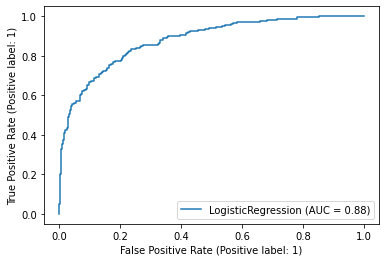

In [41]:
plot_roc_curve(clf, X_test, y_test)

## Precision recall curve

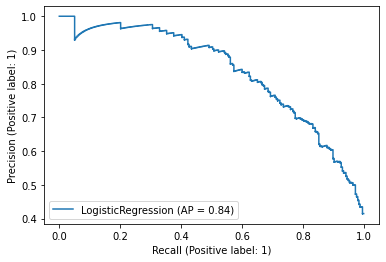

In [42]:
plot_precision_recall_curve(clf, X_test, y_test)

## Classification Report

In [43]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [44]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.41435
AUC = 0.87972
Average Precision = 0.83605

Using 0.5 as threshold:
Accuracy = 0.81022
Precision = 0.79630
Recall = 0.66667
F1 score = 0.72574

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       427
           1       0.80      0.67      0.73       258

    accuracy                           0.81       685
   macro avg       0.81      0.78      0.79       685
weighted avg       0.81      0.81      0.81       685



## Confusion Matrix

Confusion Matrix


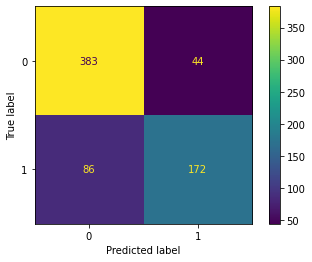

In [45]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

# Comparing both coefficients and standard deviation of columns to see how they performed against each other...

In [46]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.754207
1,Gender,-0.128126
2,Race,0.017786
3,Ethnicity,0.015257
4,Region,0.218241
...,...,...
63,RHO,-0.059553
64,RED,-0.069520
65,RI,-0.814598
66,RRF,-0.145428


In [47]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,Gender,0.234527
1,Race,0.487536
2,Ethnicity,0.238606
3,Region,1.624034
4,Age,0.948419
...,...,...
62,RHO,0.121429
63,RED,0.057228
64,RI,0.066045
65,RRF,0.143969
